# Analyse exploratoire de la base de données du site d'e-commerce Olist

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

Le site d'e-commerce Olist a fournit un ensemble de datasets pour pouvoir effectuer une segmentation de ces clients. Ci-dessous le schéma expliquant le fonctionnement de ces fichiers.
<img src="MCD.png">

## 1 - Analyses des données en lien avec les clients

In [2]:
# Importation 
df_customers = pd.read_csv("datasets/olist_customers_dataset.csv")
df_geo = pd.read_csv("datasets/olist_geolocation_dataset.csv")

In [3]:
df_customers = pd.merge(df_geo, df_customers,
                        right_on=["customer_zip_code_prefix", "customer_city", "customer_state"], 
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_customers.drop(["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], axis=1, inplace=True)
df_customers = df_customers[['customer_id', "customer_unique_id", "customer_zip_code_prefix", "customer_city", "customer_state", "geolocation_lat", "geolocation_lng"]]
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194


### Recherche de données manquantes et dupliquées

In [4]:
df_customers.isnull().mean()

customer_id                 0.000000
customer_unique_id          0.000000
customer_zip_code_prefix    0.000000
customer_city               0.000000
customer_state              0.000000
geolocation_lat             0.000023
geolocation_lng             0.000023
dtype: float64

In [5]:
df_customers[df_customers.duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
9,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644
48,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497904,-47.405578
55,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.513713,-47.396644
57,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.479901,-47.397403
59,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509746,-47.393731
...,...,...,...,...,...,...,...
14129663,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594582,-46.907318
14129669,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593740,-46.909114
14129675,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.594954,-46.908662
14129677,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398,6703,cotia,SP,-23.593577,-46.910112


In [6]:
df_customers.drop_duplicates(inplace=True)

Il y a quelque valeurs manquantes en ce qui concerne les coordonnées de géolocalisation de nos clients. On supprime les données dupliquées du dataset. 

### Description de l'origine des clients

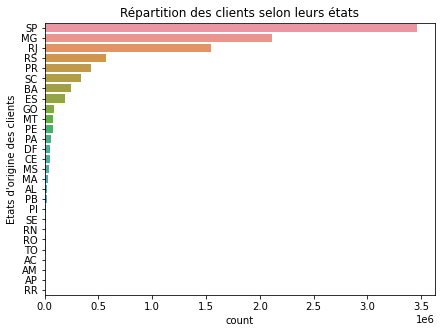

In [7]:
plt.figure(figsize=(7,5))
sns.countplot(y="customer_state", data=df_customers, order=df_customers["customer_state"].value_counts().index)
plt.title("Répartition des clients selon leurs états")
plt.ylabel("Etats d'origine des clients")
plt.show()

Un grand nombre de nos clients vit dans l'état de Sao Paolo. Il s'agit de l'état le plus peuplé du Brésil. Il pourrait être intéressant de faire un calcul en pondérant le nombre de clients sur le nombre d'habitants dans les différents états brésiliens. 

SP : Sao Paolo, MG : Minas Gerais, RJ : Rio de Janeiro, RS : Rio Grande do Sul, PR : Paranà, SC : Santa Catarina, BA : Bahia, ES : Espírito Santo, GO : Goias, MT : Mato Grosso, PE : Pernambuco, PA : Parà, DF : Distrito Federal, CE : Cearà, MS : Mato Grosso do Sul, MA : Maranhão, AL : Alagoas, PB : Paraíba, PI : Piauí, SE : Sergipe, RN : Rio Grande do Norte, RO : Rondônia, TO : Tocantins, AC : Acre, AM : Amazonas, AP : Amapá, RR : Roraima.

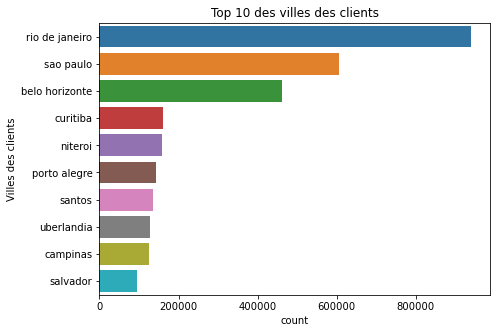

In [8]:
plt.figure(figsize=(7,5))
sns.countplot(y="customer_city", data=df_customers, order=df_customers["customer_city"].value_counts().index[:10])
plt.title("Top 10 des villes des clients")
plt.ylabel("Villes des clients")
plt.show()

La majorité des clients vivent à Rio de Janeiro. Il s'agit de la seconde ville la plus peuplée du Brésil. Elle possède 8% de la population du pays. On observe qu'ensuite les clients vivent à Sao Paolo, qui est la ville la plus peuplée du pays. Enfin, en troisième position, on retrouve Belo Horizonte. Cette ville se situe dans l'état de Minas Gerais. 

In [9]:
print("Nombre d'id customer :", df_customers["customer_id"].nunique())

Nombre d'id customer : 99441


In [10]:
print("Nombre d'id customer unique:", df_customers["customer_unique_id"].nunique())

Nombre d'id customer unique: 96096


In [11]:
print("Nombre de villes:", df_customers["customer_city"].nunique())

Nombre de villes: 4119


Les clients se répartissent dans 4119 villes. Le Brésil compte 5570 villes. 

fig = px.scatter_mapbox(df_geo, lat="geolocation_lat", lon="geolocation_lng", color="geolocation_state",
                        zoom=1.5, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## 2 - Analyses des commandes

In [12]:
df_orders = pd.read_csv("datasets/olist_orders_dataset.csv")
df_orders_payments = pd.read_csv("datasets/olist_order_payments_dataset.csv")
df_review = pd.read_csv("datasets/olist_order_reviews_dataset.csv")
df_order_items = pd.read_csv("datasets/olist_order_items_dataset.csv")

In [13]:
df_orders = pd.merge(df_orders, df_orders_payments, on ="order_id")
df_orders = pd.merge(df_orders, df_review, on="order_id")
df_orders = pd.merge(df_orders, df_order_items, on="order_id")
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,...,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,...,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


### Recherche de données manquantes et dupliquées

In [14]:
df_orders.isnull().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.000127
order_delivered_carrier_date     0.010599
order_delivered_customer_date    0.021874
order_estimated_delivery_date    0.000000
payment_sequential               0.000000
payment_type                     0.000000
payment_installments             0.000000
payment_value                    0.000000
review_id                        0.000000
review_score                     0.000000
review_comment_title             0.880920
review_comment_message           0.571779
review_creation_date             0.000000
review_answer_timestamp          0.000000
order_item_id                    0.000000
product_id                       0.000000
seller_id                        0.000000
shipping_limit_date              0.000000
price                            0.000000
freight_value                    0

On observe qu'il y a un grand nombre de données manquantes pour les titres et les messages donnant un avis sur la commande. On a un nombre moins important de valeurs manquantes pour les variables en lien avec la livraison. 

In [15]:
df_orders[df_orders.duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value


On remarque qu'il n'y a pas de données dupliquées dans notre jeu de données. 

### Description des variables en lien avec les commandes

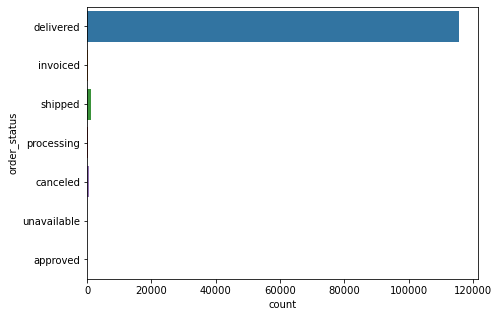

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(y="order_status", data=df_orders)
plt.show()

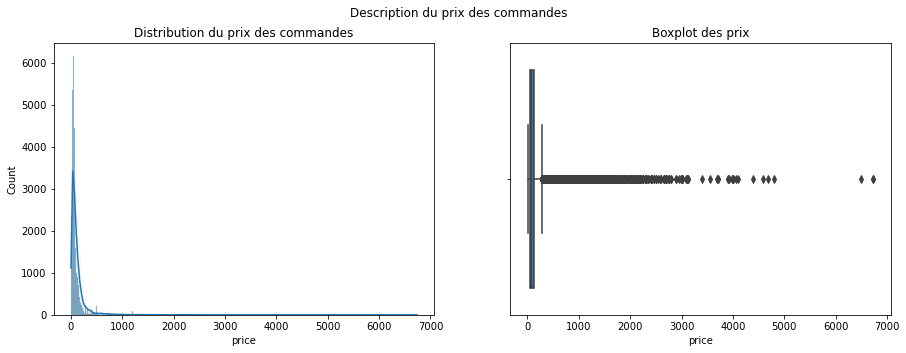

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description du prix des commandes')

sns.histplot(ax=axes[0],x="price", data=df_orders, kde=True)
axes[0].set_title("Distribution du prix des commandes")

sns.boxplot(ax=axes[1], x="price", data=df_orders)
axes[1].set_title("Boxplot des prix")

plt.show()

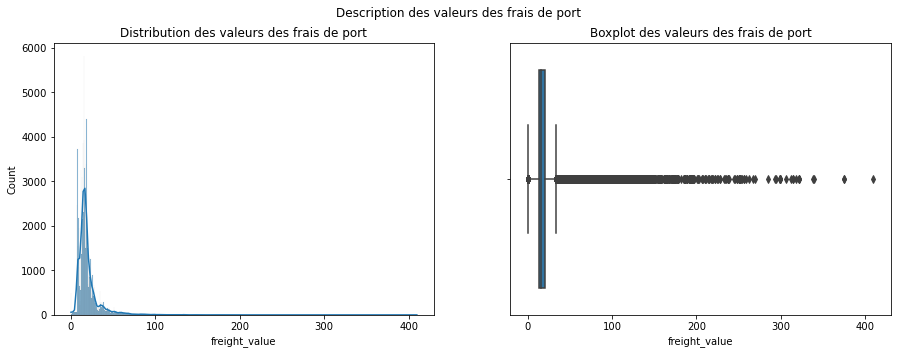

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description des valeurs des frais de port')

sns.histplot(ax=axes[0],x="freight_value", data=df_orders, kde=True)
axes[0].set_title("Distribution des valeurs des frais de port")

sns.boxplot(ax=axes[1], x="freight_value", data=df_orders)
axes[1].set_title("Boxplot des valeurs des frais de port")

plt.show()

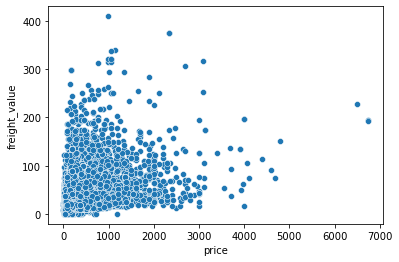

In [19]:
sns.scatterplot(x="price", y="freight_value", data=df_orders)
plt.show()

## 3 - Analyses des produits

In [20]:
df_products = pd.read_csv("datasets/olist_products_dataset.csv")
df_translation = pd.read_csv('datasets/product_category_name_translation.csv')

In [21]:
df_products = pd.merge(df_products, df_translation, on="product_category_name")
df_products.drop("product_category_name", axis=1, inplace=True)
df_products.head()

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery


### Recherche de valeurs manquantes et de données dupliquées

In [22]:
df_products.isnull().mean()

product_id                       0.000000
product_name_lenght              0.000000
product_description_lenght       0.000000
product_photos_qty               0.000000
product_weight_g                 0.000031
product_length_cm                0.000031
product_height_cm                0.000031
product_width_cm                 0.000031
product_category_name_english    0.000000
dtype: float64

On observe quelques valeurs manquantes pour les caractéristiques physiques de produits (poids, longueurs, hauteurs, largeurs).

In [23]:
df_products[df_products.duplicated()]

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english


On n'a aucune valeur dupliquée sur ce jeu de données. 

### Descriptions des variables en lien avec les produits

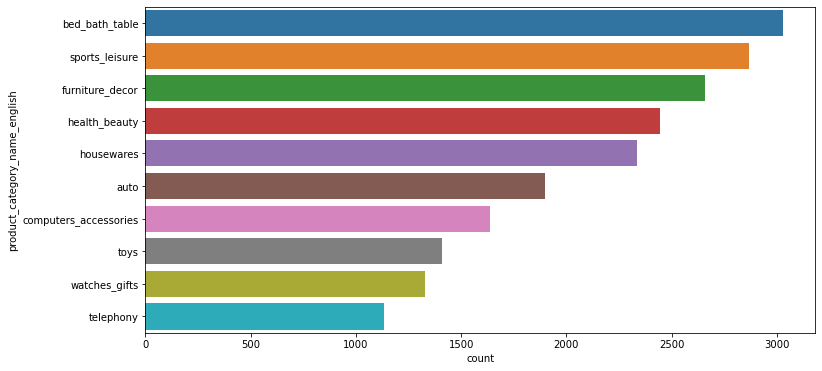

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(y="product_category_name_english", data=df_products, order=df_products["product_category_name_english"].value_counts().index[:10])
plt.show()

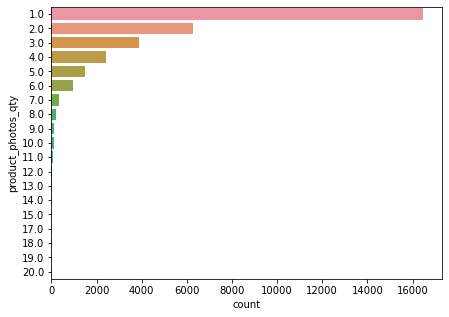

In [25]:
plt.figure(figsize=(7, 5))
sns.countplot(y="product_photos_qty", data=df_products)
plt.show()

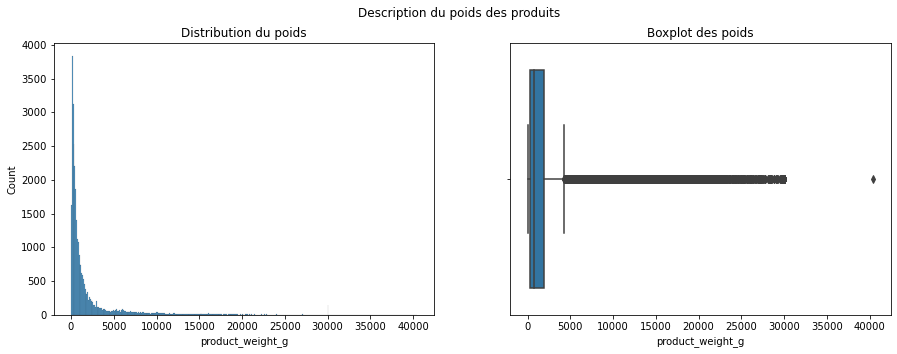

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description du poids des produits')

sns.histplot(ax=axes[0],x="product_weight_g", data=df_products)
axes[0].set_title("Distribution du poids")

sns.boxplot(ax=axes[1], x="product_weight_g", data=df_products)
axes[1].set_title("Boxplot des poids")

plt.show()

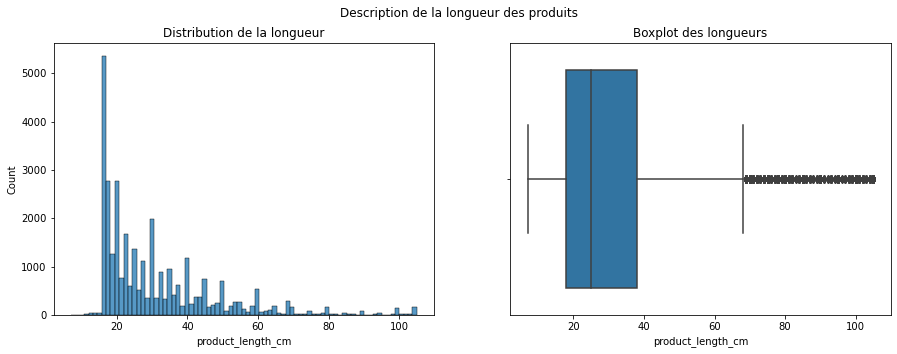

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la longueur des produits')

sns.histplot(ax=axes[0],x="product_length_cm", data=df_products)
axes[0].set_title("Distribution de la longueur")

sns.boxplot(ax=axes[1], x="product_length_cm", data=df_products)
axes[1].set_title("Boxplot des longueurs")

plt.show()

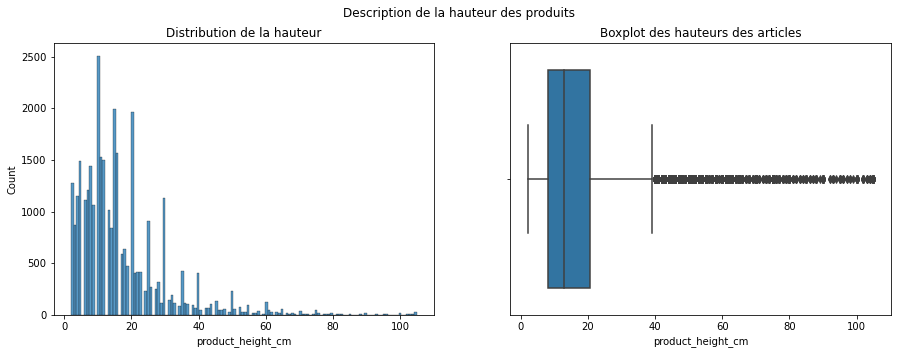

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la hauteur des produits')

sns.histplot(ax=axes[0],x="product_height_cm", data=df_products)
axes[0].set_title("Distribution de la hauteur")

sns.boxplot(ax=axes[1], x="product_height_cm", data=df_products)
axes[1].set_title("Boxplot des hauteurs des articles")

plt.show()

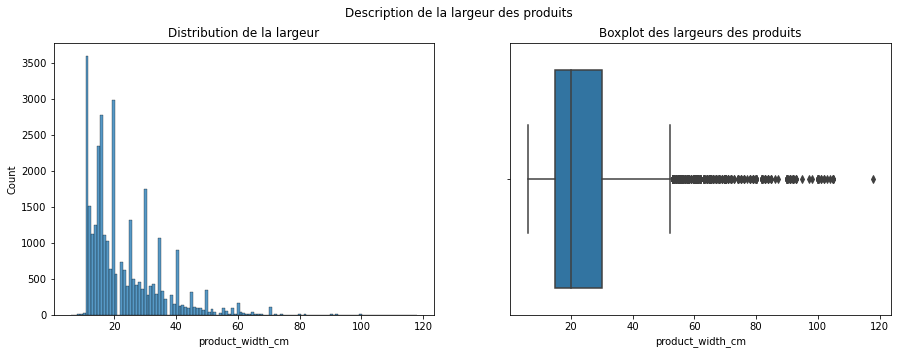

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
fig.suptitle('Description de la largeur des produits')

sns.histplot(ax=axes[0],x="product_width_cm", data=df_products)
axes[0].set_title("Distribution de la largeur")

sns.boxplot(ax=axes[1], x="product_width_cm", data=df_products)
axes[1].set_title("Boxplot des largeurs des produits")

plt.show()

## 4 - Analyse des vendeurs

In [30]:
df_sellers = pd.read_csv("datasets/olist_sellers_dataset.csv")

In [31]:
df_sellers = pd.merge(df_geo, df_sellers,
                        right_on=["seller_zip_code_prefix", "seller_city", "seller_state"], 
                        left_on=["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], how="right")
df_sellers.drop(["geolocation_zip_code_prefix", "geolocation_city", "geolocation_state"], axis=1, inplace=True)
df_sellers = df_sellers[['seller_id', "seller_zip_code_prefix", "seller_city", "seller_state", "geolocation_lat", "geolocation_lng"]]
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431


In [32]:
df_sellers.isnull().mean()

seller_id                 0.000000
seller_zip_code_prefix    0.000000
seller_city               0.000000
seller_state              0.000000
geolocation_lat           0.000355
geolocation_lng           0.000355
dtype: float64

In [33]:
df_sellers[df_sellers.duplicated()]

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
8,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
17,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891836,-47.062373
20,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893202,-47.064104
21,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.897460,-47.062217
26,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.897460,-47.062217
...,...,...,...,...,...,...
385701,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011269,-45.590514
385704,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.004329,-45.591269
385710,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011805,-45.580629
385715,9e25199f6ef7e7c347120ff175652c3b,12051,taubate,SP,-23.011633,-45.588712


In [34]:
df_sellers.drop_duplicates(inplace=True)

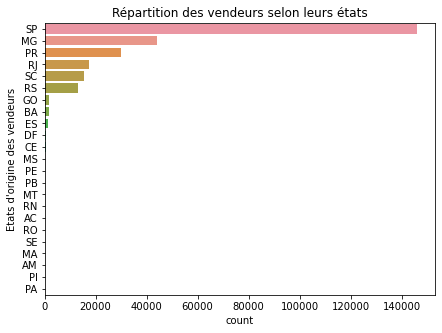

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(y="seller_state", data=df_sellers, order=df_sellers["seller_state"].value_counts().index)
plt.title("Répartition des vendeurs selon leurs états")
plt.ylabel("Etats d'origine des vendeurs")
plt.show()

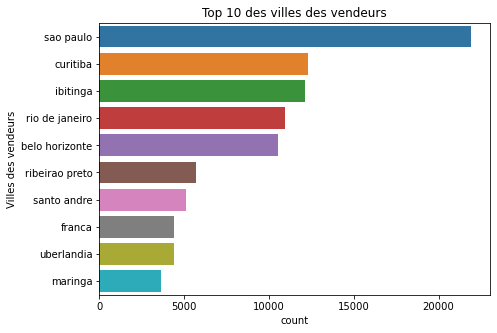

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(y="seller_city", data=df_sellers, order=df_sellers["seller_city"].value_counts().index[:10])
plt.title("Top 10 des villes des vendeurs")
plt.ylabel("Villes des vendeurs")
plt.show()

In [37]:
print("Nombre d'id seller :", df_sellers["seller_id"].nunique())

Nombre d'id seller : 3095


In [38]:
print("Nombre de villes:", df_sellers["seller_city"].nunique())

Nombre de villes: 611
